## 1.5 非定常問題

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 非定常状態の実装

In [3]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        reward = rate > np.random.rand()
        self.rates += 0.1 * np.random.randn(self.arms)  # Add noise
        return int(reward)

#### エージェントの実装

In [4]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        a, r = action, reward
        self.ns[a] += 1
        self.qs[a] += (r - self.qs[a]) / self.ns[a]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.qs))
        return np.argmax(self.qs)

In [5]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        a, r = action, reward
        self.qs[a] += (r - self.qs[a]) * self.alpha  # alphaで更新

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.qs))
        return np.argmax(self.qs)

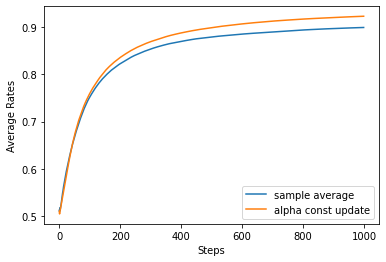

In [6]:
runs = 2000
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ["sample average", "alpha const update"]
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (2000, 1000)

    for run in range(runs):
        if agent_type == "sample average":
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        sum_r = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            sum_r += reward
            rates.append(sum_r / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel("Average Rates")
plt.xlabel("Steps")
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()